<a href="https://colab.research.google.com/github/YusufAbdurrahmann/mall-customer-segmentation-clustering/blob/main/mall_customer_segmentation_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# **Data Importing**

In [18]:
df = pd.read_csv("sample_data/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# **Data Understanding**

In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# **Data Cleaning**

In [37]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [10]:
df.duplicated().sum()

np.int64(0)

# **Explanatory Data Analysis (EDA)**

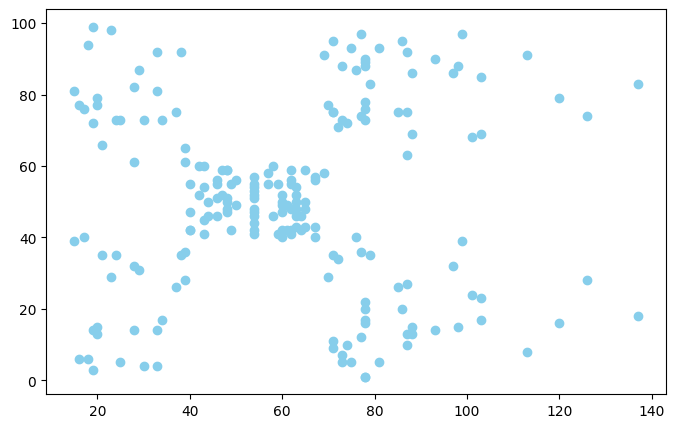

In [62]:
plt.figure(figsize = (8,5))
plt.scatter(df["Annual Income (k$)"],df["Spending Score (1-100)"], color= "skyblue")

# **Data Prepration**

In [70]:
x_train = df[["Annual Income (k$)","Spending Score (1-100)"]].values

# **Feature Scalling**

In [102]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)

# **Modelling**

In [115]:
km = KMeans(n_clusters = 2)

y_cluster = km.fit_predict(x_train)

In [116]:
y_cluster

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

In [117]:
df["cluster"] = y_cluster

In [118]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,0


<ipython-input-120-f8297669fd48>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(km.cluster_centers_[0,0], km.cluster_centers_[0,1],cmap = "rainbow", marker = "*", s = 150, label = "Centroid = 0")
<ipython-input-120-f8297669fd48>:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(km.cluster_centers_[1,0], km.cluster_centers_[1,1],cmap = "rainbow", marker = "*", s = 150, label = "Centroid = 1")


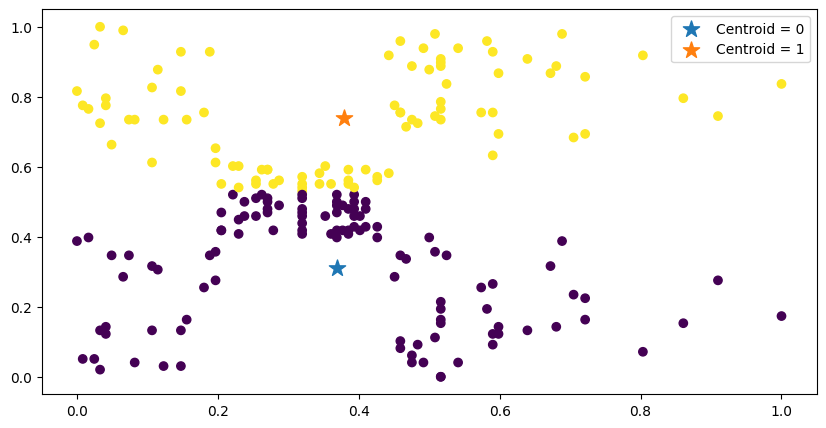

In [120]:
plt.figure(figsize = (10,5))
plt.scatter(x_train[:,0],x_train[:,1], c = km.labels_)
plt.scatter(km.cluster_centers_[0,0], km.cluster_centers_[0,1],cmap = "rainbow", marker = "*", s = 150, label = "Centroid = 0")
plt.scatter(km.cluster_centers_[1,0], km.cluster_centers_[1,1],cmap = "rainbow", marker = "*", s = 150, label = "Centroid = 1")
# plt.scatter(km.cluster_centers_[2,0], km.cluster_centers_[2,1],cmap = "rainbow", marker = "*", s = 150, label = "Centroid = 2")
plt.legend()

In [121]:
inertias = []
k_range = range(1,10)
for k in k_range:
  km = KMeans(n_clusters = k).fit(x_train)
  inertias.append(km.inertia_)

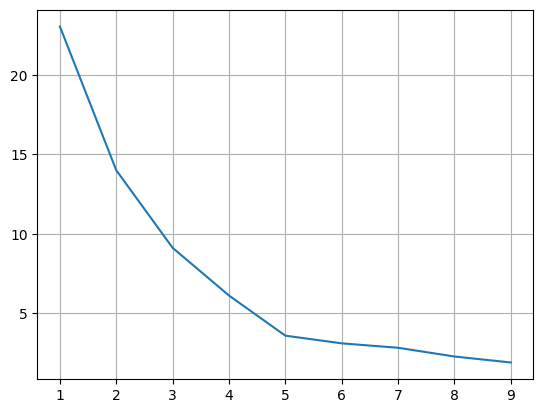

In [122]:
plt.plot(k_range,inertias)
plt.grid()

In [123]:
df["cluster"] = df["cluster"] .replace([0,1],["Sedikit","Banyak"])

In [124]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,Sedikit
1,2,Male,21,15,81,Banyak
2,3,Female,20,16,6,Sedikit
3,4,Female,23,16,77,Banyak
4,5,Female,31,17,40,Sedikit
...,...,...,...,...,...,...
195,196,Female,35,120,79,Banyak
196,197,Female,45,126,28,Sedikit
197,198,Male,32,126,74,Banyak
198,199,Male,32,137,18,Sedikit
